# Exercise 1 #

A fixed-coupond bond is a financial instrument characterised with maturity $T$-years, coupon $c$ (which is assumed to be paid out annually) and principal $P$. For such a bond, a bond holder gets $cP$ amound of money at the end of each year before maturity, and at the maturity they get $cP +P$. The value of the bond at time $t=0$ is equal to the present value of the underlying cashflows.

1. Assume that the interest rate at time $t=0$ is flat and equal $r$. Write down a formula for calculating the value of the bond at time $t=0$ given the parameters $r, T, c, P$. (4p)

## Solution exercise 1.1

Blackboard

2. Write a function (script) which calculates the value of the bond, given parameters $r,c,P,T$. Run the function for $r=5\%$, $c=4\%$, $T=10$ and $P=1000$.  Run the function again changing different parameters and plot the results (paramater agains the value of the bond), first with the interest rate ($r=1,2,3,4,5,6,7,8,9,10\%$), then coupon ($c=1,2,3,4,5,6,7,8,9,10\%$) and at last, the maturity of the bond ($T=2,4,6,8,10,12,14,16,18,20$). What does the results tell you about the relation between different level of parameters and the value of the bond? (8p)

## Solution Exercise 1.2

In [1]:
### INPUTS
maturity<-10
principal<-1000
coupon<-0.04
interest<-0.05

In [3]:
#define
calculate_bond_value<-function(maturity,principal,coupon,interest){
    #define the cashflows
    cashflow<-rep(coupon*principal,times=maturity)
    cashflow[maturity]<-cashflow[maturity]+principal
    cashflow <-cbind(1:maturity,cashflow)
    
    #discount the cashflows
    discounted_cashflow<-cashflow
    for (i in 1:maturity){
        discounted_cashflow[i,2]<-cashflow[i,2]/(1+interest)^cashflow[i,1]
    }
    
    #calculate value: OUTPUT
    value<-sum(discounted_cashflow[,2])

    return(value)
}

calculate_bond_value(maturity,principal,coupon,interest)

[1] 922.7827

In [6]:
### INPUT 
interest_sen<-1:10/100

#define the matrix with the bond_values for different interest rates
values<-matrix(nrow=length(interest_sen),ncol=2)

# calculate the bond value
for (i in 1:length(interest_sen)){
    values[i,1]<-interest_sen[i]
    values[i,2]<-calculate_bond_value(maturity,principal,coupon,interest_sen[i])
}

###output
values

[,1] [,2]     
 [1,] 0.01 1284.1391
 [2,] 0.02 1179.6517
 [3,] 0.03 1085.3020
 [4,] 0.04 1000.0000
 [5,] 0.05  922.7827
 [6,] 0.06  852.7983
 [7,] 0.07  789.2926
 [8,] 0.08  731.5967
 [9,] 0.09  679.1171
[10,] 0.10  631.3260

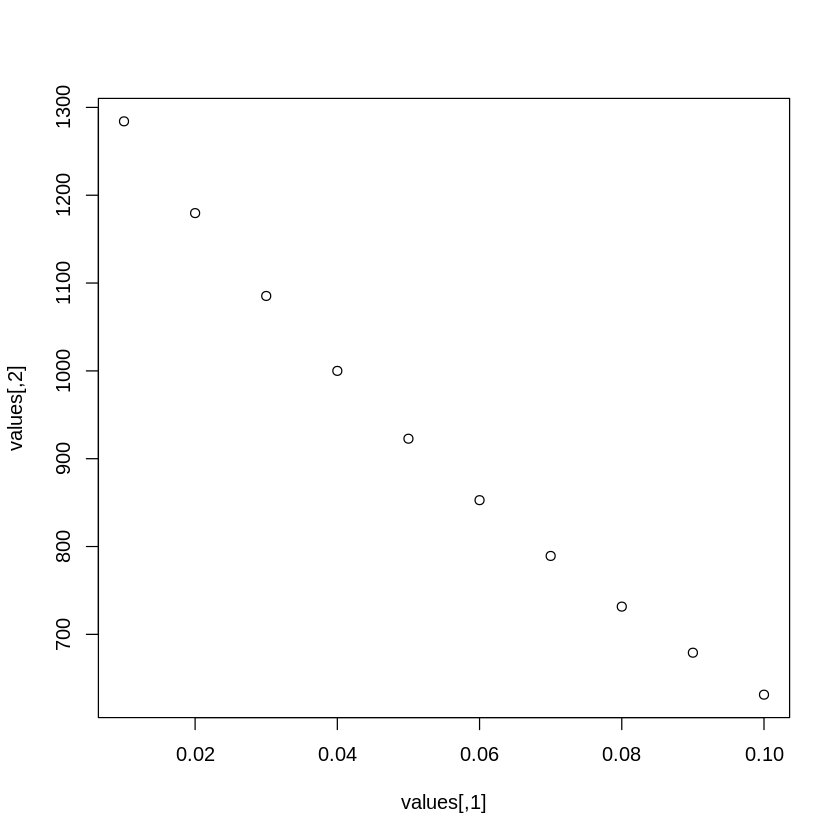

In [7]:
plot(values)

In [8]:
### INPUT 
coupon_sen<-1:10/100

#define the matrix with the coupon_sen for different interest rates
values<-matrix(nrow=length(interest_sen),ncol=2)

# calculate the bond value
for (i in 1:length(coupon_sen)){
    values[i,1]<-coupon_sen[i]
    values[i,2]<-calculate_bond_value(maturity,principal,coupon_sen[i],interest)
}

###output
values

[,1] [,2]     
 [1,] 0.01  691.1306
 [2,] 0.02  768.3480
 [3,] 0.03  845.5653
 [4,] 0.04  922.7827
 [5,] 0.05 1000.0000
 [6,] 0.06 1077.2173
 [7,] 0.07 1154.4347
 [8,] 0.08 1231.6520
 [9,] 0.09 1308.8694
[10,] 0.10 1386.0867

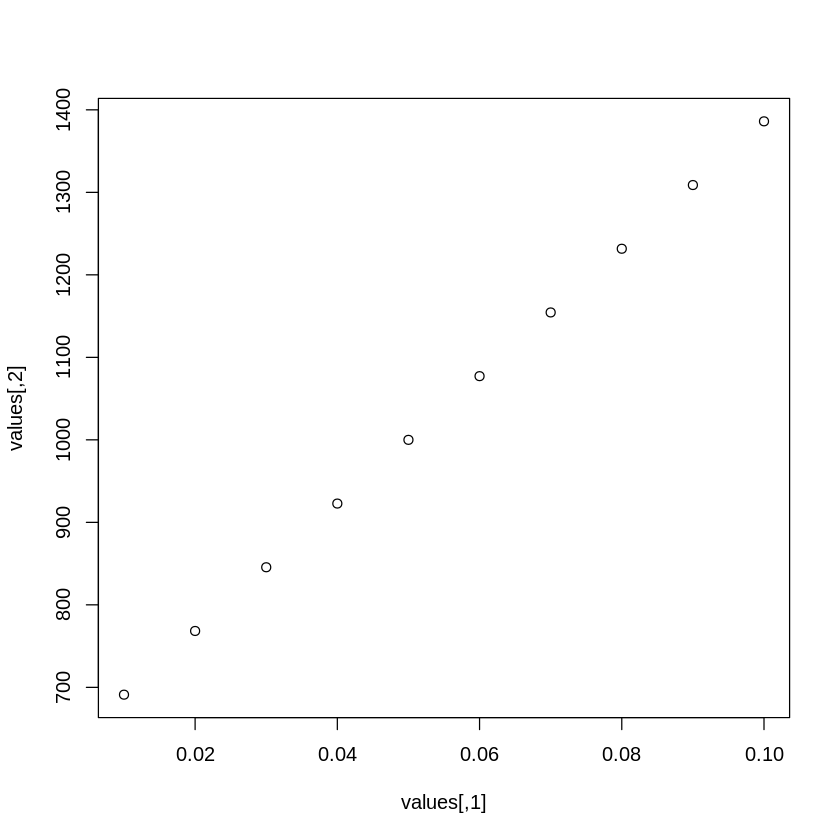

In [9]:
plot(values)

In [10]:
### INPUT 
mat_sen<-1:10*2

#define the matrix with the coupon_sen for different interest rates
values<-matrix(nrow=length(mat_sen),ncol=2)

# calculate the bond value
for (i in 1:length(mat_sen)){
    values[i,1]<-mat_sen[i]
    values[i,2]<-calculate_bond_value(mat_sen[i],principal,coupon,interest)
}

###output
values

[,1] [,2]    
 [1,]  2   981.4059
 [2,]  4   964.5405
 [3,]  6   949.2431
 [4,]  8   935.3679
 [5,] 10   922.7827
 [6,] 12   911.3675
 [7,] 14   901.0136
 [8,] 16   891.6223
 [9,] 18   883.1041
[10,] 20   875.3779

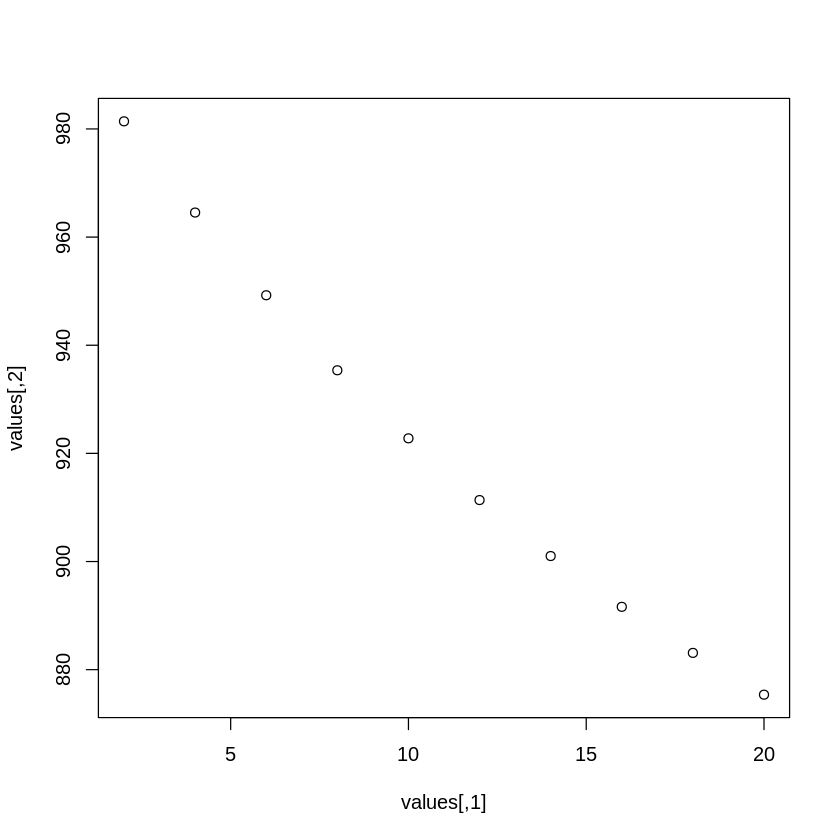

In [11]:
plot(values)

3. Calculate the duration of the bond for $r=5\%$, $c=4\%$, $T=10$ and $P=1000$ and give an interpretation to it. Assume that the interest rate has increased from $r=5\%$ to $r=6\%$. How much would the price of the bond change, as prescribed by the duration? What is the real change in the value of the bond? Why those two value are different? (8p)

## Solution Exercise 4

In [13]:
calculate_bond_duration<-function(maturity,principal,coupon,interest){
    #define the cashflows
    cashflow<-rep(coupon*principal,times=maturity)
    cashflow[maturity]<-cashflow[maturity]+principal
    cashflow <-cbind(1:maturity,cashflow)
    
    #discount the cashflows
    discounted_cashflow<-cashflow
    for (i in 1:maturity){
        discounted_cashflow[i,2]<-cashflow[i,2]/(1+interest)^cashflow[i,1]
    }
    
    #calculate value: OUTPUT
    value<-sum(discounted_cashflow[,2]*cashflow[,1])/sum(discounted_cashflow[,2])

    return(value)
}

In [16]:
dur<-calculate_bond_duration(maturity,principal,coupon,interest)
dur

[1] 8.359589

change approximated by duration

In [17]:
-dur * (0.06-0.05) * calculate_bond_value(maturity,principal,coupon,interest)/(1+interest)

[1] -73.46747

Approximated value

In [19]:
-dur * (0.06-0.05) * calculate_bond_value(maturity,principal,coupon,interest)/(1+interest)+
    calculate_bond_value(maturity,principal,coupon,interest)

[1] 849.3152

Real value

In [20]:
calculate_bond_value(maturity,principal,coupon,interest+0.01)

[1] 852.7983

# Exercise 2
We assume that a random sample $Z_1,\ldots,Z_n$ is Reyleigh-distributed. The density, expected value and variance of Reyleigh distribution is given by:
$$f(x) =\begin{cases}
     \frac{x}{\sigma^2} \exp\left(-\frac{ x^2}{2\sigma^2}\right)       & \quad \text{if } x>0\\
    0  & \quad \text{otherwise } 
  \end{cases} $$
  $$ \mathbb E X=\sigma\sqrt{\pi/2}$$
  $$ \mathbb{VAR}(X)=\frac{4-\pi}{2} \sigma^2.$$
  
 

1. Derive an inverse sampler for a Reyleigh-distribution (Note: You are expected to compute first the CDF by integration by substitution, then the inverse of CDF). (5p)

$F^{-1}(u)=\sigma\sqrt{-2\ln(1-u)}$

2. Derive the moment estimator of $\sigma$. (5p)

$ \sigma_{mm}=\bar X_n\sqrt{\frac{2}{\pi}}$

3. Write a log-likelihood function $\mathcal L(\sigma)$.  Derive the maximum likelihood estimator of $\sigma$. (5p)

$ \sigma_{ml}=\sqrt{\frac{1}{2n}\sum_{i=1}^nx_i^2}$

4. Write a script for a function which calculates the maximum likelihood estimatetors given a sample $Z_1,\ldots,Z_n$. Function should be general enough to handle different $n$. 

In [24]:
estimate_sigma_ml<-function(x){
    n<-length(x)
    sigma<- (sum(x^2)/(2*n))^0.5 
}

5. Generate $n=10, 100, 1000, 10000, 1000000$ simulations using the inverse sampler (simulations for different $n$ should be drawn independently) for parameters $\sigma=3$. Compute a moment estimatior $\sigma_{MM}$ and maximum likelihood estimator $\sigma_{ML}$ for each $n$  using a function from a previous points and prepare a table presenting the estimated parameters for different $n$. Compare it to the true value of parameter and comment on the estimation error. (5p)

In [23]:
generate_ray<-function(n,sigma){
    u<-runif(n)
    x <- sigma*(-2*log(1-u))^0.5
    return(x)
}

In [30]:
#### INPUT
n=c(10,100,1000,10000,100000)
sigma=3

MM<-cbind(n,rep(0,times=length(n)))
ML<-cbind(n,rep(0,times=length(n)))

for (i in 1:length(n)){
    print(paste("N=",n[i]))
    x=generate_ray(n[i],sigma)
    ML[i,2]=estimate_sigma_ml(x)
    print(paste("ML=",ML[i,2]))
    MM[i,2]=mean(x)*(2/pi)^0.5
    print(paste("MM=",MM[i,2]))
    
}

[1] "N= 10"
[1] "ML= 2.88897654850751"
[1] "MM= 2.93817008695092"
[1] "N= 100"
[1] "ML= 2.89261395172873"
[1] "MM= 2.89722725712971"
[1] "N= 1000"
[1] "ML= 3.05038940657277"
[1] "MM= 3.06221336577764"
[1] "N= 10000"
[1] "ML= 3.00356565335221"
[1] "MM= 3.00999659119662"
[1] "N= 1e+05"
[1] "ML= 3.00738545375832"
[1] "MM= 3.00880345877067"


6. Using the closed-form formula compute mean, standard deviation and $0,025$ and $0,975$-quantiles for \textbf{the Reyleight-distribution} with estimated parameters $\sigma_{MM}$ and $\sigma_{ML}$ for each $n$ estimated in the previous point, as well as for true value of the parameter. Present the values in the table and comment on them.(5p)

In [31]:
MM<-rbind(MM,c(0,sigma))

average<-MM[,2]*(2/pi)*0.5
stdev<-((4-pi)/2)^0.5 *MM[,2]
perc_2_5<-MM[,2]*(-2*log(1-0.025))^0.5
perc_97_5<-MM[,2]*(-2*log(1-0.975))^0.5

MM<-cbind(MM,average,stdev,perc_2_5,perc_97_5)
MM

n              average   stdev    perc_2_5  perc_97_5
[1,] 1e+01 2.938170 0.9352486 1.924902 0.6611576 7.980666 
[2,] 1e+02 2.897227 0.9222161 1.898079 0.6519445 7.869457 
[3,] 1e+03 3.062213 0.9747328 2.006167 0.6890702 8.317593 
[4,] 1e+04 3.009997 0.9581117 1.971958 0.6773202 8.175762 
[5,] 1e+05 3.008803 0.9577319 1.971177 0.6770518 8.172521 
[6,] 0e+00 3.000000 0.9549297 1.965409 0.6750708 8.148609

In [32]:
ML<-rbind(ML,c(0,sigma))

average<-ML[,2]*(2/pi)*0.5
stdev<-((4-pi)/2)^0.5 *ML[,2]
perc_2_5<-ML[,2]*(-2*log(1-0.025))^0.5
perc_97_5<-ML[,2]*(-2*log(1-0.975))^0.5

ML<-cbind(ML,average,stdev,perc_2_5,perc_97_5)
ML

n              average   stdev    perc_2_5  perc_97_5
[1,] 1e+01 2.888977 0.9195898 1.892674 0.6500879 7.847047 
[2,] 1e+02 2.892614 0.9207476 1.895057 0.6509064 7.856927 
[3,] 1e+03 3.050389 0.9709691 1.998421 0.6864096 8.285477 
[4,] 1e+04 3.003566 0.9560646 1.967745 0.6758731 8.158294 
[5,] 1e+05 3.007385 0.9572805 1.970248 0.6767327 8.168669 
[6,] 0e+00 3.000000 0.9549297 1.965409 0.6750708 8.148609

# Exercise 3

We assume the compound Poisson model.  In this model, the claim number from all policies is modelled as a random variable $N\sim Poiss(\lambda)$ and the claim size $Z_i$ is distributed according to exponential distribution with a parameter  $\beta$ (defined as in the lectures). $Z_1,Z_2,\ldots$ are i.i.d. and independent of $N$. Then the sum of all claims can be defined as $X=\sum_{i=1}^N Z_i$. 

Assume that the insurer bought a reinsurance programme per event such that the reinsurer cover the part of the claim exceeding a fixed number $b>0$ ($H^{event}(x)=max(0,x-b)$).
1.  Define a sequence of random variables $U_i,\ i=1,2,\ldots$ as 
	$$U_i =\begin{cases}
     1       & \quad \text{if } Z_i>b\\
    0  & \quad \text{otherwise } 
  \end{cases} $$
  Prove that $(U_1,U_2,\ldots)$ is an independent and identically distributed sequence of random variables. (5p)
2. Define $N_b:=\sum_{i=1}^N U_i$. Prove that $N_b\sim Poiss(\lambda \mathbb P (Z_1>b))$. (15p)
	Tips: 1. fix $k$. If $N_b=k$ it means that $N$ must be at least $k$. Use it together with the the law of total probability to express $\mathbb P(N_b=k)=\sum_{n=k}^{\infty}\mathbb P(N_b=k|N=n)\mathbb P(N=n)$. 2. Note that for a fixed $n$ the random variable $\sum_{i=1}^n U_i$ is binominally distributed. 3. Note that $e^x=\sum_{n=0}^{\infty} \frac{x^k}{k!}$.
3. Fix any $i=1,2,\ldots$. Prove that $\mathbb P(Z_i>x+b|Z_i>b)=\mathbb P(Z_i>x)$. Argue that random variable $Z_i-b$ conditioned on $Z_i>b$ (i.e. using conditional probability) has an exponential distribution with the same parameter $\beta$. (5p)
4. For $n=1,2,3,...$ define the following random variable: $$\tau_n=\min\{k\in\mathbb N: k>\tau_{n-1}\text{ and } U_k=1 \}$$ where $\tau_0=0$. $\tau_n$ has the intrepretation as a (random) index identifying on which element of the sequence $U_1, U_2, \ldots$ the value $1$ is taken for the n-th time. Argue that the following equality is true $$  \sum_{i=1}^N H^{event}(Z_i)=\sum_{k=1}^{N_b} (Z_{\tau_k}-b).$$ The equality should be understood $\omega$-wise (i.e. those two objects are really the same). (5p)
5. It can be proven that $Z_{\tau_1},Z_{\tau_2},\ldots$ are i.i.d. and that $(Z_{\tau_n}-b)\sim Exp(\beta)$. Moreover,  is independent of $N_b$. Use those facts (without proving them) and the previous point to prove the following explicit formulas for the pure reinsurance premium for our contract as well for the standard deviation of the reinsurance recoverables from that contract $X^{re}:=  \sum_{i=1}^N H^{event}(Z_i)$. (10p)
	$$ \pi^{reinsurance,pure}=\frac{\lambda}{\beta}\exp(-\beta b)$$
	$$ \mathbb{VAR}(X^{re})=\frac{2\lambda\exp(-\beta b)}{\beta^2}$$

##  Exercise 4
We are in the setup of Assignment 3. Write a program which simulates the sum of reinsurance recoverables $X^{re}$ from that exercise and simulate $n=10, 100,1000, 10000$ simulations and for parameters $\lambda=10$, $\beta=0.25$ and $b=5$. Compute the estimate of the pure reinsurance premium and standard deviation of the reinsurance recoverables from the simulations for different $n$. Moreover, compute the pure reinsurance premium and standard deviation  by the explicit formulas given in the Assignment 3(5) and compare it with the simulated ones. Comment on simulation error. 
	
Note: you can either use the inverse sampler to simulate from the exponential distribtion or you can use the fact that exponential distribution is a special case of gamma distribution and use a ready gamma sampler. In the second case make sure that you use the right parametrisation!

In [7]:
#input
m=c(10,100,1000,10000)
lambda=10
beta=0.25
b=5

#draw exponential
draw_exponential<-function(beta,n){
    u<-runif(n)
    x<-(log(1-u)/(-beta))
    return(x)
}

#program
generate_compound_poiss<-function(lambda,beta,b,m){
    N <- rpois(m,lambda)
    Xre <- rep(0,m)
    for(i in 1:m)
      {
            Z <- draw_exponential(beta,N[i])
            Xre[i] <- sum(pmax(Z-b,0))
      }
    return(Xre)
}

for (i in 1:4){
    Xre<-generate_compound_poiss(lambda,beta,b,m[i])
    print(paste("Number of simulations: ",m[i]))
    print(paste("Simulated average:", mean(Xre)))
    print(paste("Simulated sd:", sd(Xre)))
    print(paste("True average:", lambda/beta*exp(-beta*b)))
    print(paste("True sd:", (2*lambda/beta^2*exp(-beta*b))^0.5))
    print("-----")
}



[1] "Number of simulations:  10"
[1] "Simulated average: 12.7645367169462"
[1] "Simulated sd: 9.3294132139151"
[1] "True average: 11.4601918744076"
[1] "True sd: 9.57504751921685"
[1] "-----"
[1] "Number of simulations:  100"
[1] "Simulated average: 12.5470140009292"
[1] "Simulated sd: 11.0940703765532"
[1] "True average: 11.4601918744076"
[1] "True sd: 9.57504751921685"
[1] "-----"
[1] "Number of simulations:  1000"
[1] "Simulated average: 11.098532377864"
[1] "Simulated sd: 9.37508244487934"
[1] "True average: 11.4601918744076"
[1] "True sd: 9.57504751921685"
[1] "-----"
[1] "Number of simulations:  10000"
[1] "Simulated average: 11.4646351404571"
[1] "Simulated sd: 9.472376627215"
[1] "True average: 11.4601918744076"
[1] "True sd: 9.57504751921685"
[1] "-----"
